# Subject

We provide here a data set on the customers of a bank:
- CustomerId = customer id in the information system of the bank
- Surname = surname of the customer
- CreditScore = score attributed by the bank as estimation of capacity to reimburse a loan
- Geography = country of the customer
- Gender = sex of the customer
- Age = age of the customer
- Tenure = loan duration (year)
- Balance = amount of money on main account (\$)
- NumOfProducts = number of products the customer has in the banl
- HasCrCard = tells if the customer owns a credit card
- IsActiveMember = tells if the customer has an active account
- EstimatedSalary = estimated salary of the customer (\$)
- Exited = tells if the customer has left the bank

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

In [2]:
dataset=pd.read_csv('data/bank_churn.csv')
dataset.sample(n=10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8473,8474,15802009,Mazzi,770,France,Female,33,6,0.00,2,1,1,126131.90,0
3110,3111,15707596,Chung,546,Germany,Female,74,8,114888.74,2,1,1,66732.63,1
5532,5533,15602572,Hsing,720,France,Male,33,9,0.00,2,1,1,142956.48,0
6621,6622,15710365,Thomson,646,France,Male,50,0,104129.24,2,1,0,181794.86,1
7570,7571,15791944,Harker,697,France,Male,32,7,175464.85,3,1,0,116442.42,1
9316,9317,15766355,Lettiere,550,Germany,Male,49,0,108806.96,3,1,0,61446.92,1
4449,4450,15569364,Victor,666,France,Male,36,3,0.00,2,1,0,35156.54,0
4542,4543,15585455,Stewart,630,France,Male,28,9,0.00,2,0,0,32599.35,0
9272,9273,15583138,Persse,739,France,Male,42,2,141642.92,2,1,0,172149.76,0
8742,8743,15661827,Brown,693,Spain,Female,45,4,0.00,2,1,1,26589.56,0


The objective of the bank is to predict the churn, i.e. if a customer is likely to leave the bank, based on her profile (estimated salary, geography, age, etc.). Here, we will prepare the data set so that it can be directly used for ML processing. The work is limited to data exploration and preparation, we will not make ML prediction yet.

Your tasks:

Make some data exploration with at least three plots of your choice (3 points). Examples: distribution of the values within one feature, repartition of a feature depending on the target value, etc.
Prepare the data set (7 points). Example: dropping unrelevant data, preparing the predictors and the response, data encoding, train/test split, data scaling.

# Make some data exploration

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
dataset.shape

(10000, 14)

In [5]:
dataset.columns.values

array(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype=object)

In [6]:
dataset.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
dataset.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

Amongst 1000 client(customerId):
    2932 surname are available. So there are so many clients have the same Surname.
    Binary variables(Gender,HasCrCard,IsActiveMember,Exited) have 2 modalities

### Distribution of the values within one feature [ Category and Binary ]

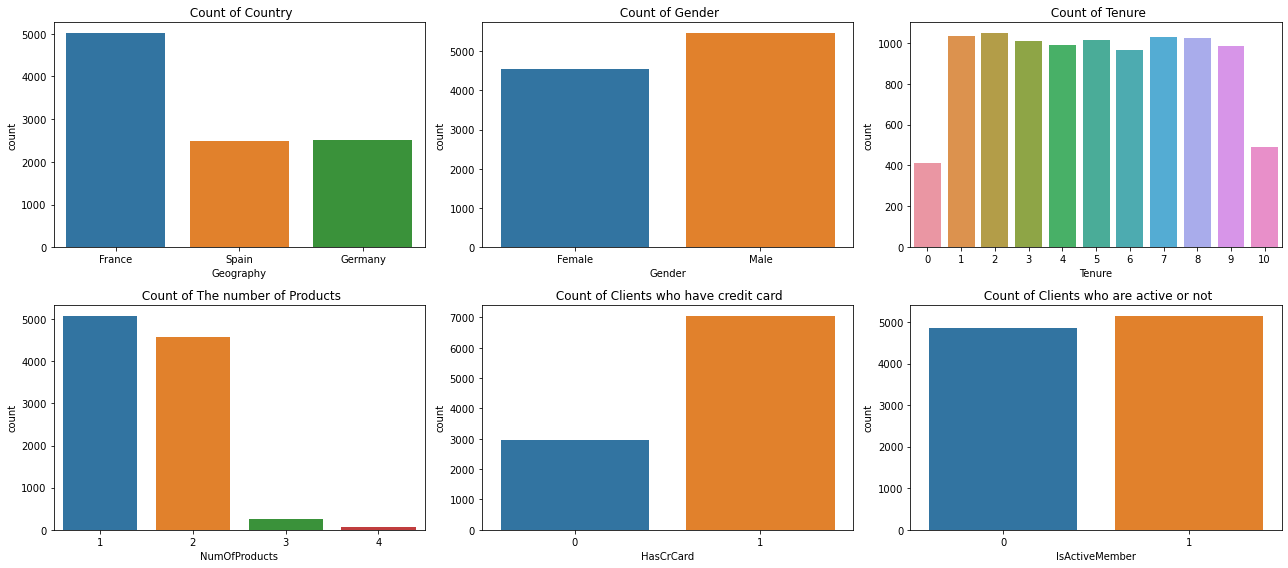

In [8]:
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,8))
sns.countplot(x='Geography', data = dataset, ax = axes[0,0])
axes[0,0].set_title(' Count of Country')

sns.countplot(x='Gender', data = dataset, ax = axes[0,1])
axes[0, 1].set_title(' Count of Gender')

sns.countplot(x='Tenure', data = dataset, ax = axes[0,2])
axes[0, 2].set_title(' Count of Tenure')

sns.countplot(x='NumOfProducts', data = dataset, ax = axes[1,0])
axes[1, 0].set_title(' Count of The number of Products')

sns.countplot(x='HasCrCard', data = dataset, ax = axes[1,1])
axes[1, 1].set_title(' Count of Clients who have credit card')

sns.countplot(x='IsActiveMember', data = dataset, ax = axes[1,2])
axes[1, 2].set_title(' Count of Clients who are active or not')

plt.tight_layout()
plt.show()

The customer's bank distributes in three countries such as France, Spain, Germany. Among them, the number of customers in France accounts for the majority.
The number of male customers is more than female.
Most of NumofProducts are 1 and 2
More customer have credit carte than none.

### Histograms of the numerical features:

Text(0.5, 1.0, 'Distribution of EstimatedSalary')

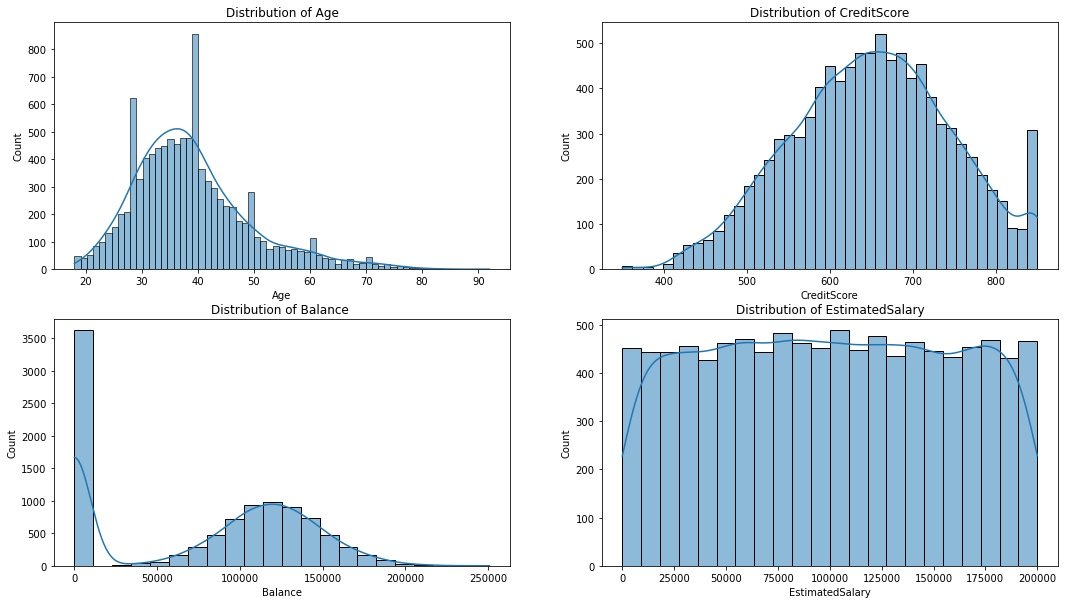

In [9]:
# # Dustribution Age 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,10))

sns.histplot(x='Age', data = dataset, ax = axes[0,0],kde = True)
axes[0,0].set_title('Distribution of Age')

sns.histplot(x='CreditScore', data = dataset, ax = axes[0,1],kde = True)
axes[0,1].set_title('Distribution of CreditScore')

sns.histplot(x='Balance', data = dataset, ax = axes[1,0],kde = True)
axes[1,0].set_title('Distribution of Balance ')

sns.histplot(x='EstimatedSalary', data = dataset, ax = axes[1,1],kde = True)
axes[1,1].set_title('Distribution of EstimatedSalary')


### Repartition of a feature depending on the target value

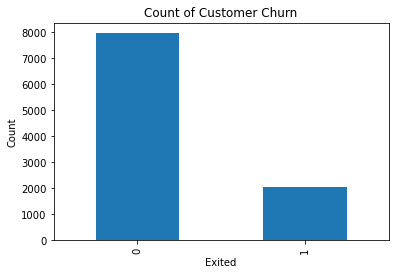

In [10]:
df_plot = dataset.groupby(['Exited']).size() 
df_plot.plot(kind='bar')
plt.ylabel('Count')
plt.title('Count of Customer Churn')
plt.show()

In [11]:
# Let check which features correlate with target
correlation = dataset.corr()

<ipython-input-12-e520d93ed6c0>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation, dtype=np.bool)


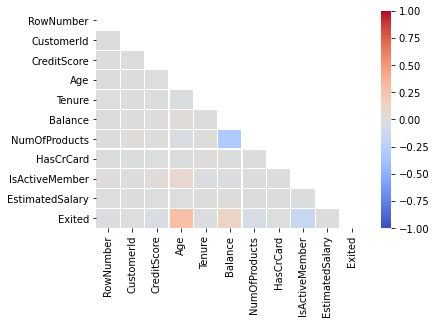

In [12]:
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True  # Mask to keep only one half of the symetrical matrix
sns.heatmap(correlation,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            mask = mask,
            linewidths=0.1)
plt.show()

Exited seems to be somehow correlated with Age, Balance, isActiveMember.

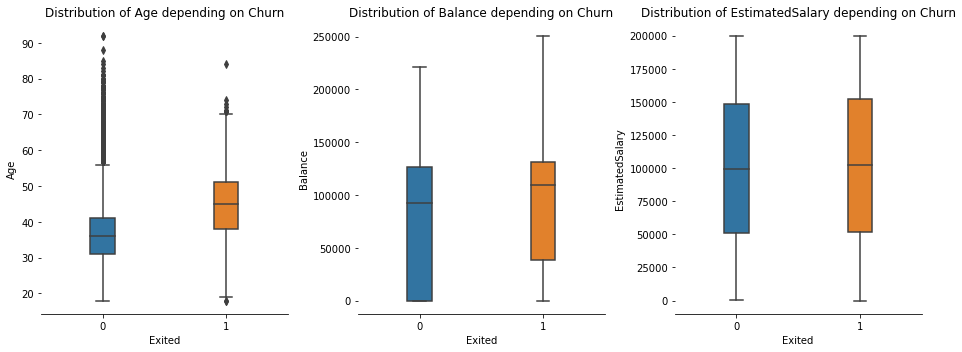

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13,5))

sns.boxplot(y='Age', x='Exited', data = dataset, width = 0.2, ax = axes[0])
axes[0].set_title('Distribution of Age depending on Churn')

sns.boxplot(y='Balance', x='Exited', data = dataset, width = 0.2, ax = axes[1])
axes[1].set_title('Distribution of Balance depending on Churn')

sns.boxplot(y='EstimatedSalary', x='Exited', data = dataset, width = 0.2, ax = axes[2])
axes[2].set_title('Distribution of EstimatedSalary depending on Churn')

sns.despine(left=True)

plt.tight_layout()
plt.show()

In [14]:
dataset['Exited'].unique()

array([1, 0], dtype=int64)

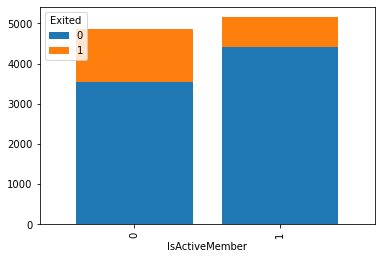

In [15]:
Tenure = dataset.groupby(['IsActiveMember','Exited']).size().reset_index().pivot(index='IsActiveMember', columns='Exited', values=0)
Tenure.plot(kind='bar', stacked=True, width=0.8)
plt.show()

Now, it seems more obvious that Balance,Age, IsActiveMember have an impact on Exited, on the contrary to EstimateSalary.

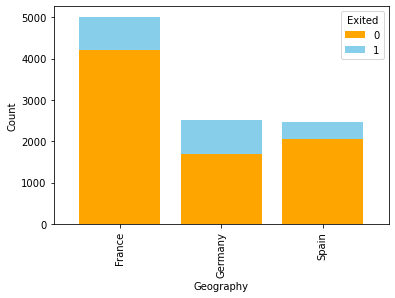

In [16]:
# Let's check repartition of GEO depending on the target value
df_plot = dataset.groupby(['Geography', 'Exited']).size().unstack().plot(kind='bar', stacked=True, color=['orange', 'skyblue'], width=0.8)
plt.ylabel('Count')
plt.show()

# Prepare the data set. Example: dropping unrelevant data, preparing the predictors and the response, data encoding, train/test split, data scaling.

#### Dropping unrelevant data

In [17]:
dataset=dataset.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

#### Preparing the predictors and the response

In [18]:
X=dataset.drop('Exited', axis=1)

In [19]:
y=dataset['Exited']

## Data encoding for category features

#### Method 1 encoder binary and category in 2 step speparate

In [20]:
X_raw = X.copy()

In [21]:
from sklearn.preprocessing import OrdinalEncoder
X_ord_encoded = X.copy()


In [22]:
#OrdinalEncoder for Binary value (Gender)
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(X_ord_encoded[['Gender']])
X_ord_encoded['Gender'] = ordinal_encoder.transform(X_ord_encoded[['Gender']])
X_ord_encoded.head(6)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0.0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0.0,41,1,83807.86,1,0,1,112542.58
2,502,France,0.0,42,8,159660.80,3,1,0,113931.57
3,699,France,0.0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0.0,43,2,125510.82,1,1,1,79084.10
5,645,Spain,1.0,44,8,113755.78,2,1,0,149756.71


#### One hot encoder for categorical data

In [23]:
from sklearn.compose import ColumnTransformer
#method 1 using OnehotEncoder (ColumTransforme)
from sklearn.preprocessing import OneHotEncoder

oh_encoder = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Geography'])], remainder='passthrough')

X_oh_ord_encoded = oh_encoder.fit_transform(X_ord_encoded)

X_oh_ord_encoded[:2]

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 6.1900000e+02,
        0.0000000e+00, 4.2000000e+01, 2.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 6.0800000e+02,
        0.0000000e+00, 4.1000000e+01, 1.0000000e+00, 8.3807860e+04,
        1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.1254258e+05]])

In [24]:
# method 2 using dumies
X = pd.get_dummies(X_ord_encoded, columns=['Geography'], prefix=['is'])
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,is_France,is_Germany,is_Spain
0,619,0.0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0.0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0.0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0.0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0.0,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1.0,39,5,0.00,2,1,0,96270.64,1,0,0
9996,516,1.0,35,10,57369.61,1,1,1,101699.77,1,0,0
9997,709,0.0,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,1.0,42,3,75075.31,2,1,0,92888.52,0,1,0


#### Method 3 Even better alternative: combine multiple transformers in one ColumnTransformer

In [25]:
binary_columns = ['Gender']
categorical_columns = ['Geography']
non_encoded_columns = list(X_raw.drop(binary_columns,axis=1).drop(categorical_columns, axis=1))
print (non_encoded_columns)


['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [26]:
from sklearn.preprocessing import OrdinalEncoder

transform_pipeline = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(), binary_columns),
        ('one_hot', OneHotEncoder(), categorical_columns)
    ], 
    remainder='passthrough'
)

# Transform features as a numPy array
X_numpy = transform_pipeline.fit_transform(X_raw)
X_numpy[:2]

array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        6.1900000e+02, 4.2000000e+01, 2.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        6.0800000e+02, 4.1000000e+01, 1.0000000e+00, 8.3807860e+04,
        1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.1254258e+05]])

In [27]:
# Wrap the transformed features in a DataFrame with named columns
final_column_names = np.concatenate([
    transform_pipeline.named_transformers_['one_hot'].get_feature_names_out(),
    binary_columns,
    non_encoded_columns
])
X = pd.DataFrame(X_numpy, columns=final_column_names)
X.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.0,1.0,0.0,0.0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,0.0,0.0,0.0,1.0,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,0.0,1.0,0.0,0.0,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,0.0,1.0,0.0,0.0,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,0.0,0.0,0.0,1.0,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10


#### Data set split

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7500, 12)
(2500, 12)
(7500,)
(2500,)


## Scaling (Scaling for mumerical features)

In [30]:
numerical_feature = ['CreditScore','Age','Balance','Tenure','NumOfProducts','EstimatedSalary']
X_train[numerical_feature].head(6)

,CreditScore,Age,Balance,Tenure,NumOfProducts,EstimatedSalary
983,614.0,35.0,128100.28,6.0,1.0,69454.24
4533,850.0,39.0,206014.94,6.0,2.0,42774.84
2866,727.0,26.0,121508.28,9.0,1.0,146785.44
9966,479.0,35.0,125920.98,4.0,1.0,20393.44
8607,602.0,38.0,71667.97,2.0,2.0,137111.89
459,637.0,37.0,0.00,8.0,1.0,186062.36


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train.loc[:,numerical_feature] = scaler.fit_transform(X_train[numerical_feature])
X_test.loc[:,numerical_feature] = scaler.transform(X_test[numerical_feature])
X_train[numerical_feature].head(6)

,CreditScore,Age,Balance,Tenure,NumOfProducts,EstimatedSalary
983,-0.374153,-0.373000,0.818022,0.345587,-0.911416,-0.538399
4533,2.057804,0.003856,2.069040,0.345587,0.817370,-1.001468
2866,0.790301,-1.220926,0.712179,1.386092,-0.911416,0.803821
9966,-1.765315,-0.373000,0.783031,-0.348084,-0.911416,-1.389937
8607,-0.497812,-0.090358,-0.088069,-1.041754,0.817370,0.635920
459,-0.137140,-0.184572,-1.238789,1.039257,-0.911416,1.485542
